> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [22]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime

# https://volderette.de/jupyter-notebook-tip-multiple-outputs/
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

debugging = True

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

print(datetime.now())

df = pd.read_csv("tmdb-movies.csv")

print(datetime.now())

2019-08-02 21:52:17.865305
2019-08-02 21:52:17.970022


In [30]:
if debugging: 
    print(datetime.now())
    
    df.head(5)
    
    print(datetime.now()) 

2019-08-01 17:18:12.815113


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


2019-08-01 17:18:12.849113


In [3]:
if debugging:
    print(datetime.now())
    
    df.info()
    
    print(datetime.now())

2019-08-02 21:35:11.409720
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int6

In [4]:
if debugging:
    print(datetime.now())
    
    df.describe()
    
    print(datetime.now())

2019-08-02 21:35:18.357366


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


2019-08-02 21:35:18.424187


In [5]:
if debugging:
    print(datetime.now())
    
    df.dtypes
    
    print(datetime.now())

2019-08-02 21:35:23.128173


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

2019-08-02 21:35:23.131166


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [24]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#====================================================


#========================
# get hybrids 
# hybrids in 2018
#hb_18 = df_18[df_18['fuel'].str.contains('/')]
#hb_18
#========================
# create two copies of the 2008 hybrids dataframe
#df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
#df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle
#========================
# columns to split by "/"
#split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
#for c in split_columns:
#    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
#    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
#========================
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
#df1
#========================
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
#df2
#========================
# combine dataframes 
#new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
#new_rows
#========================
# https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
# ^ see answer using 'take'

# drop the original hybrid rows
#df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
#df_08 = df_08.append(new_rows, ignore_index=True)
#========================
# check that all the original hybrid rows with "/"s are gone
#df_08[df_08['fuel'].str.contains('/')]
#========================
#df_08.shape
#========================
#these are null genres
#424 
#620
#997
#1712
#======================================================

print(datetime.now())

#df.iloc[620]["id"] == 361043
df.query("id ==361043")

# keep only those that are not null 
#criteria = ~(df['genres'].isnull())
criteria = ~(df['id'].isnull())
genres_df = df[ criteria ]["genres"].str.split("|", expand=True)

if debugging:
    print("-----------")
    genres_df.head(622).tail()
    print("-----------")
    
genres_df = genres_df.stack().reset_index()

if debugging:
    genres_df
    print("-----------")
    genres_df[ (genres_df["level_0"] > 618) & (genres_df["level_0"] < 622) ]
    print("-----------")
    
genres_df.drop('level_0', axis=1, inplace=True)
genres_df.drop('level_1', axis=1, inplace=True)
    
genres_df.rename( columns={0: "genre"}, inplace=True )

if debugging:
    genres_df
        
print(datetime.now())

2019-08-02 21:52:43.827816


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0


-----------


,0,1,2,3,4
617,Horror,Comedy,Drama,None,None
618,Drama,TV Movie,None,None,None
619,Science Fiction,Mystery,Horror,Thriller,None
620,NaN,NaN,NaN,NaN,NaN
621,Horror,None,None,None,None


-----------


,level_0,level_1,0
0,0,0,Action
1,0,1,Adventure
2,0,2,Science Fiction
3,0,3,Thriller
4,1,0,Action
5,1,1,Adventure
6,1,2,Science Fiction
7,1,3,Thriller
8,2,0,Adventure
9,2,1,Science Fiction


-----------


,level_0,level_1,0
1372,619,0,Science Fiction
1373,619,1,Mystery
1374,619,2,Horror
1375,619,3,Thriller
1376,621,0,Horror


-----------


,genre
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Action
5,Adventure
6,Science Fiction
7,Thriller
8,Adventure
9,Science Fiction


2019-08-02 21:52:43.920531


In [36]:
#df.head(622).tail()

print(datetime.now())

criteria = ~(df['id'].isnull())
genres_df2 = df[ criteria ][["id", "genres"]]

if debugging:
    print("-----------")
    genres_df2.head()
    genres_df2.head(622).tail()
    print("-----------")

genres_df3 = genres_df2["genres"].str.split("|", expand=True)

print("========================-----------")
genres_df2.head()
genres_df3.head()
genres_df2.head(622).tail()
genres_df3.head(622).tail()
print("========================-----------")

print(datetime.now())

2019-08-02 22:08:36.449590
-----------


,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


,id,genres
617,253303,Horror|Comedy|Drama
618,356846,Drama|TV Movie
619,331501,Science Fiction|Mystery|Horror|Thriller
620,361043,NaN
621,329289,Horror


-----------
========================-----------


,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


,id,genres
617,253303,Horror|Comedy|Drama
618,356846,Drama|TV Movie
619,331501,Science Fiction|Mystery|Horror|Thriller
620,361043,NaN
621,329289,Horror


,0,1,2,3,4
617,Horror,Comedy,Drama,None,None
618,Drama,TV Movie,None,None,None
619,Science Fiction,Mystery,Horror,Thriller,None
620,NaN,NaN,NaN,NaN,NaN
621,Horror,None,None,None,None


========================-----------
2019-08-02 22:08:36.508398


In [38]:
genres_df4 = pd.concat( [genres_df2, genres_df3], axis=1, join="inner" )
genres_df4.head(622).tail()

,id,genres,0,1,2,3,4
617,253303,Horror|Comedy|Drama,Horror,Comedy,Drama,None,None
618,356846,Drama|TV Movie,Drama,TV Movie,None,None,None
619,331501,Science Fiction|Mystery|Horror|Thriller,Science Fiction,Mystery,Horror,Thriller,None
620,361043,NaN,NaN,NaN,NaN,NaN,NaN
621,329289,Horror,Horror,None,None,None,None


In [50]:
kw_df = pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[0]} )

kw_df = kw_df.append( pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[1]} ), ignore_index=False )
kw_df = kw_df.append( pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[2]} ), ignore_index=False )
kw_df = kw_df.append( pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[3]} ), ignore_index=False )
kw_df = kw_df.append( pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[4]} ), ignore_index=False )

#kw_df
#kw_df.groupby("genre").size()
kw_df.query("id==361043")
df.shape[0] * 5 == kw_df.shape[0] 

,id,genre
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN


True

In [67]:
kw_df2 = pd.concat ( [ pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[0]} ), 
              pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[1]} ), 
              pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[2]} ), 
              pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[3]} ),
              pd.DataFrame( {"id": genres_df4["id"], "genre": genres_df4[4]} ), 
            ] )
kw_df2.query("id==361043")
df.shape[0] * 5 == kw_df2.shape[0] 

,id,genre
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN


True

In [69]:
kw_df3 = pd.concat ( [
    pd.DataFrame( 
        { "id": genres_df4["id"], "genre": genres_df4[i] } 
            )
    for i in range(5)
] )
kw_df3.query("id==361043")
df.shape[0] * 5 == kw_df3.shape[0] 

kw_df3.groupby("genre").size()

,id,genre
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN
620,361043,NaN


True

genre
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
dtype: int64

In [74]:
joined_df = df.join( kw_df3, lsuffix='_df', rsuffix='_other'       )

joined_df.shape

joined_df[ joined_df["genre"].notna() ].shape 

joined_df[ ~(joined_df["genre"].isnull()) ].shape

goto_sleep_df = joined_df[ ~(joined_df["genre"].isnull()) ]
goto_sleep_df.groupby("genre").size()

(54330, 23)

(26960, 23)

(26960, 23)

genre
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
dtype: int64

In [26]:
genre_counts = genres_df["genre"].value_counts()
type(genre_counts)
genre_counts.values
genre_counts.index.values

pandas.core.series.Series

array([4761, 3793, 2908, 2385, 1712, 1637, 1471, 1355, 1231, 1230,  916,
        810,  699,  520,  408,  334,  270,  188,  167,  165], dtype=int64)

array(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy',
       'Mystery', 'Animation', 'Documentary', 'Music', 'History', 'War',
       'Foreign', 'TV Movie', 'Western'], dtype=object)

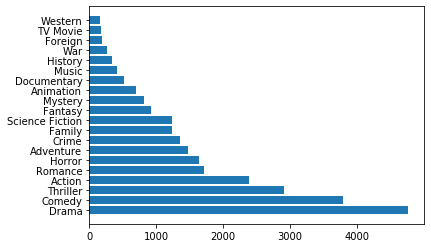

In [10]:
# https://stackoverflow.com/questions/38337918/plot-pie-chart-and-table-of-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/version/0.23.3/visualization.html#visualization-table

ax = plt.subplot()

x = genre_counts.values
y = genre_counts.index.values

ax.barh(y, x);

In [11]:
#ff.iloc[25]

#df['genres']

#xxx = df.head(30)
# regex=False is needed becasue | is a special regex character
#xxx['genres'].str.contains('|', regex=False)

#df['genres'].str.contains('|', regex=False)
#df.iloc[25]['genres']

#df.shape
# this short circiutng doesn't seem to work 
# multiple_genres_df = df[ (~df['genres'].isnull()) & ~(df['genres'].str.contains('|', regex=False)) ]

# keep only those that are not null 
criteria = ~(df['genres'].isnull())
#criteria = ~(df['id'].isnull())

multiple_genres_df = df[ criteria ]
multiple_genres_df.shape
# 10843 are not null

# keep only those that have a | in the genre
criteria = (multiple_genres_df['genres'].str.contains('|', regex=False)) 
multiple_genres_df = multiple_genres_df[ criteria ]
multiple_genres_df.shape

# 2328 do not contian |
# 8515
multiple_genres_df.index

df0 = multiple_genres_df.copy() 
df1 = multiple_genres_df.copy() 
df2 = multiple_genres_df.copy() 
df3 = multiple_genres_df.copy() 
df4 = multiple_genres_df.copy() 

print("------------")
df0.shape
print("------------")

split_columns = ['genres']

# apply split function to each column of each dataframe copy
# https://stackoverflow.com/questions/12709062/python-lambda-with-if-but-without-else/43288645
#lambda a,b: a if (a > b) else b

for c in split_columns:
    df0[c] = df0[c].apply(lambda x: x.split("|")[0] if ( len(x.split("|")) > 0 ) else None) 
    df1[c] = df1[c].apply(lambda x: x.split("|")[1] if ( len(x.split("|")) > 1 ) else None) 
    df2[c] = df2[c].apply(lambda x: x.split("|")[2] if ( len(x.split("|")) > 2 ) else None) 
    df3[c] = df3[c].apply(lambda x: x.split("|")[3] if ( len(x.split("|")) > 3 ) else None) 
    df4[c] = df4[c].apply(lambda x: x.split("|")[4] if ( len(x.split("|")) > 4 ) else None) 

new_rows = df0.append(df1)
new_rows = new_rows.append(df2)
new_rows = new_rows.append(df3)
new_rows = new_rows.append(df4)

print("------------")
new_rows.shape
print("------------")



(10843, 21)

(8515, 21)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10853, 10854, 10855, 10856, 10857, 10858, 10859, 10862, 10863,
            10864],
           dtype='int64', length=8515)

------------


(8515, 21)

------------
------------


(42575, 21)

------------


In [12]:
df[617:618]
new_rows.query("id == 253303")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Horror|Comedy|Drama,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Horror,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Comedy,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Drama,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,None,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
617,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,None,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461


In [13]:
df.shape
multiple_genres_df.shape
new_rows.shape

(10866, 21)

(8515, 21)

(42575, 21)

In [14]:
# drop the original hybrid rows
df.drop(multiple_genres_df.index, inplace=True)

In [15]:
# add in our newly separated rows
df = df.append(new_rows, ignore_index=True)

In [16]:
criteria = ~(df['genres'].isnull())
df_new = df[ criteria ]

In [17]:
df_new.shape

(26960, 21)

In [18]:
# check that all the original hybrid rows with "/"s are gone
df_new[df_new['genres'].str.contains('|', regex=False)]

df_new.shape

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


(26960, 21)

In [19]:
df_new.query("id == 253303")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2789,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Horror,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
11304,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Comedy,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461
19819,253303,tt2656588,0.025288,0,13684,Buzzard,Joshua Burge|Joel Potrykus|Teri Ann Nelson|Joe...,https://www.facebook.com/buzzardfilm,Joel Potrykus,The slacker nightmare of your dreams.,...,Paranoia forces small-time scam artist Marty t...,97,Drama,Sob Noisse Movies,3/6/15,11,6.1,2015,0.0,12589.274461


In [20]:
df_new.groupby("genres").size()

genres
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!